# Unit 5 - Financial Planning


In [181]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [182]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [183]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 10
my_eth = 20

In [184]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [220]:
# Fetch current BTC price
# YOUR CODE HERE!
fetch_btc = requests.get(btc_url)
btc_content = fetch_btc.content
#print(btc_content)
btc_data = fetch_btc.json()
#print(json.dumps(btc_data, indent=4)) 
btc_value = btc_data["data"]["1"]["quotes"]["USD"]["price"]
print(f"Today's BTC value = ${btc_value}")
# Fetch current ETH price
# YOUR CODE HERE!]
fetch_eth = requests.get(eth_url)
eth_content = fetch_eth.content
#print(eth_content)
eth_data = fetch_eth.json()
#print(json.dumps(eth_data, indent=4)) 
eth_value = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
print(f"Today's ETH value = ${eth_value}")
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

Today's BTC value = $58599.0
Today's ETH value = $1821.76
The current value of your 10 BTC is $585990.00
The current value of your 20 ETH is $36435.20


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [186]:
# Current amount of shares
# YOUR CODE HERE!
my_spy = 50
my_agg = 100

In [187]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [188]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-03-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                     SPY  \
                            open    high    low   close   volume    open   
time                                                                       
2021-03-15 00:00:00-04:00  113.6  114.01  113.6  113.94  4210749  394.33   

                                                              
                              high     low   close    volume  
time                                                          
2021-03-15 00:00:00-04:00  396.685  392.03  396.47  64471980

In [189]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.94
Current SPY closing price: $396.47


In [190]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19823.50
The current value of your 100 AGG shares is $11394.00


### Savings Health Analysis

In [191]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 4000
# Create savings DataFrame
# YOUR CODE HERE!
savings_data = {"savings": [16405.628, 40616.500]}

# Set the tickers
tickers = ["crypto", "shares"]

# Create the shares DataFrame
df_savings = pd.DataFrame(savings_data, index=tickers)

# Display savings DataFrame
display(df_savings)

,savings
crypto,16405.628
shares,40616.500


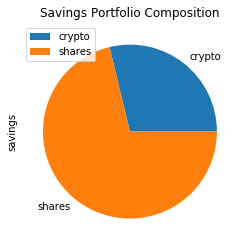

In [192]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="savings", title="Savings Portfolio Composition")

In [193]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(f"Emergency Fund = ${emergency_fund}")
# Calculate total amount of savings
# YOUR CODE HERE!
savings_total = int(df_savings.sum())
print(f"Savings Total = ${savings_total}")
# Validate saving health
# YOUR CODE HERE!
if savings_total >= emergency_fund:
    print("Savings Healthy Well Done!")
else:
    print("Not enough savings - save more!")
    

Emergency Fund = $12000
Savings Total = $57022
Savings Healthy Well Done!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [194]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-15', tz='America/New_York').isoformat()

In [195]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ["AGG", "SPY"]
timeframe = "1D"
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2020-10-20 00:00:00-04:00  117.70  117.71  117.58  117.640  3624855  343.46   
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2829309  343.33   
2020-10-22 00:00:00-04:00  117.51  117.54  117.30  117.310  3933253  342.96   
2020-10-23 00:00:00-04:00  117.30  117.52  117.30  117.470  3483335  345.93   
2020-10-26 00:00:00-04:00  117.65  117.72  117.59  117.640  4537207  342.13   

                                                              
                             high     low    close    volume  
time                                                          
2020-10-20 00:00:00-04:00  346.88  342.64  343.340  48206853  
2020-10-21 00:00:00-04:00  345.67  342.45  342.690  43419032  
2020-10-22 00:00:00-04:00  345.24  340.65  344.630  45033179  
2020-10-23 00:00:00-04:00  345.99  343.13  345.760  38762783  
2020-10-26 00:00:00-04:00  342.98  335.62  339.415  79491839

In [198]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [199]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2020-10-20 00:00:00-04:00  117.70  117.71  117.58  117.640  3624855   
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2829309   
2020-10-22 00:00:00-04:00  117.51  117.54  117.30  117.310  3933253   
2020-10-23 00:00:00-04:00  117.30  117.52  117.30  117.470  3483335   
2020-10-26 00:00:00-04:00  117.65  117.72  117.59  117.640  4537207   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2020-10-20 00:00:00-04:00          NaN  343.46  346.88  342.64  343.340   
2020-10-21 00:00:00-04:00    -0.001063  343.33  345.67  342.45  342.690   
2020-10-22 00:00:00-04:00    -0.001744  342.96  345.24  340.65  344.630   
2020-10-23 00:00:00-04:00     0.001364  345.93  345.99  343.13  345.760   
2020-10-26 00:00:00-04:00     0.001447  342.13  342.98  335.62  339.415   

                                                  
                             volume daily_return  
time                                              
2020-10-20 00:00:00-04:00  48206853          NaN  
2020-10-21 00:00:00-04:00  43419032    -0.001893  
2020-10-22 00:00:00-04:00  45033179     0.005661  
2020-10-23 00:00:00-04:00  38762783     0.003279  
2020-10-26 00:00:00-04:00  79491839    -0.018351

In [200]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998638,1.000295,0.999349,0.988822,0.998897,0.996141,1.005491,1.002814,1.001296,0.999438,...,1.005073,0.995416,0.992185,0.998554,1.001015,1.005877,1.013330,0.996614,0.992047,1.004436
2,0.999272,1.009907,0.996203,0.999054,0.991965,0.995078,1.003278,1.003397,1.001604,1.004290,...,1.009004,0.997506,0.992287,0.991453,0.999151,1.000440,1.011283,1.004618,0.984683,1.008790
3,1.001660,1.013156,0.991525,0.995138,0.994651,1.001331,0.998816,1.010475,1.008692,1.003344,...,1.014375,0.999545,0.993699,1.002915,1.004616,0.999889,1.005464,1.006402,0.990505,1.011375
4,1.000104,1.015314,0.992312,0.995031,0.992534,1.007425,0.996244,1.008123,1.015017,1.003412,...,1.021712,0.995209,0.990339,1.000778,1.004648,0.995790,1.005221,0.998761,0.986211,1.009128
5,0.992430,1.020656,0.989772,1.010628,0.992901,1.011150,0.991163,1.006223,1.016643,1.008407,...,1.028304,1.001799,0.993564,0.990296,1.006041,1.002594,1.001749,0.991729,0.990993,1.008710
6,0.998530,1.027532,0.991561,1.003372,0.995390,1.019415,0.993187,1.017751,1.011533,1.014687,...,1.033514,1.002029,0.985614,0.978806,1.005024,1.002160,1.001239,0.986294,0.985239,1.007276
7,0.989433,1.024641,0.992133,1.003701,0.995105,1.010559,0.999394,1.023143,1.004947,1.014281,...,1.023677,1.008331,0.978485,0.974023,1.018079,1.000567,1.005603,0.994264,0.993518,1.015580
8,0.985474,1.041694,0.988705,1.009929,0.992929,1.010031,1.003725,1.013032,1.014731,1.022779,...,1.022834,1.010702,0.982847,0.976949,1.023882,0.999733,1.006530,0.994596,0.990730,1.014712
9,0.993147,1.048906,0.991216,1.014138,0.998141,1.004859,1.003723,1.015020,1.012550,1.020059,...,1.029401,1.009661,0.976398,0.989294,1.018368,0.992347,1.005059,0.991571,0.996230,1.018845


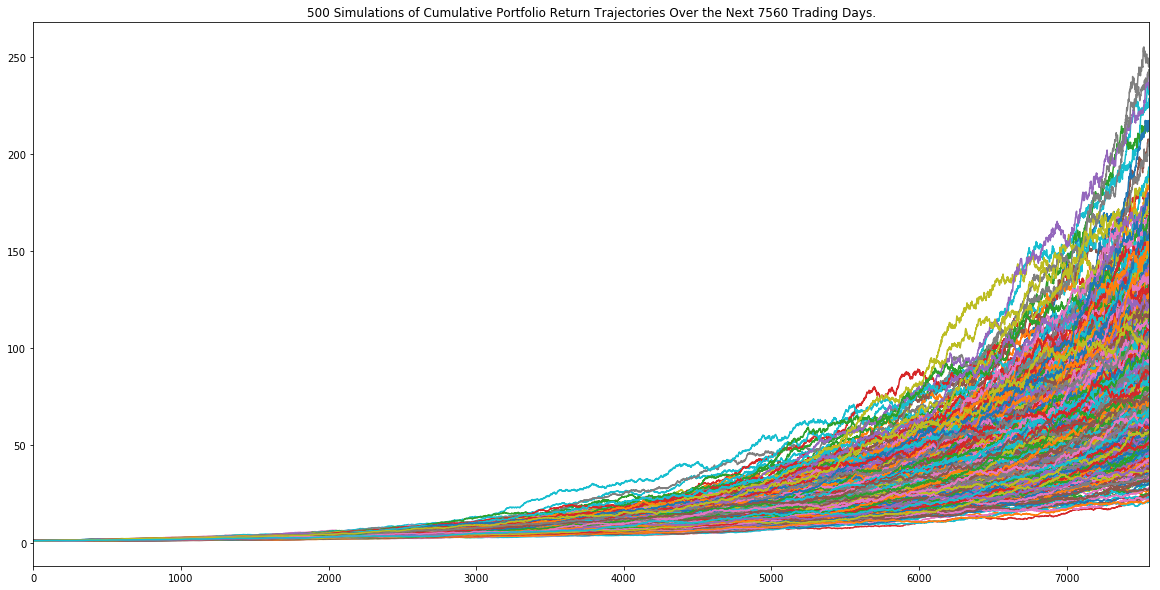

In [201]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_even_dist.plot_simulation()

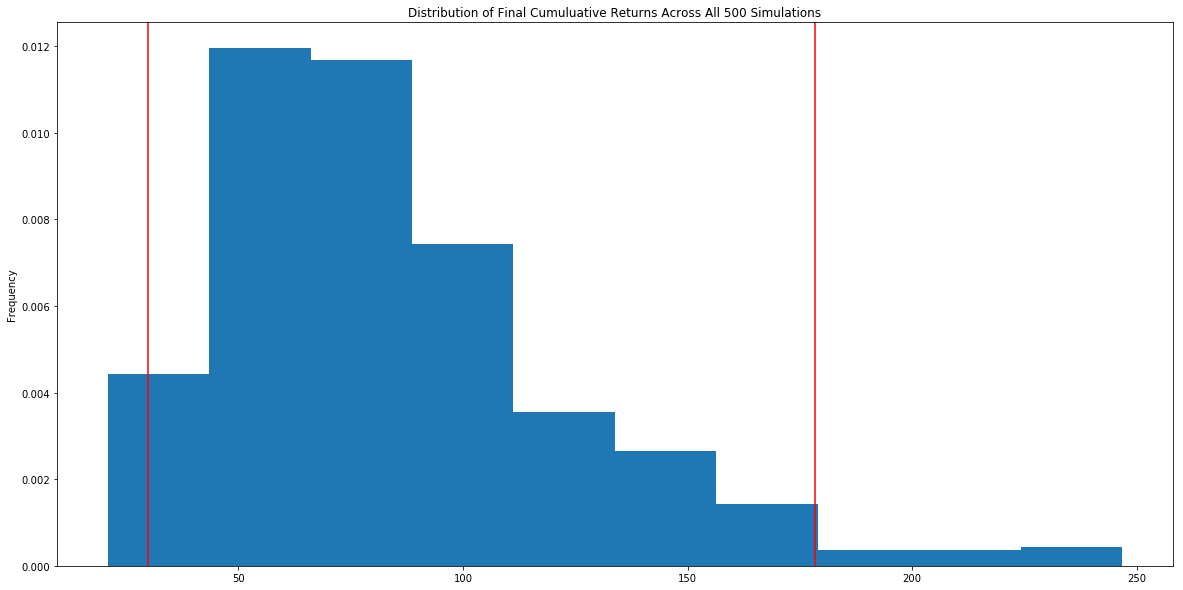

In [202]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [203]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC_summary = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(MC_summary)

count           500.000000
mean             84.286682
std              39.518130
min              20.902443
25%              57.114895
50%              76.866116
75%             101.139236
max             246.728216
95% CI Lower     29.905991
95% CI Upper    178.331266
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [204]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(MC_summary[8]*initial_investment,2)
ci_upper = round(MC_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $598119.82 and $3566625.32


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [205]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(MC_summary[8]*initial_investment,2)
ci_upper = round(MC_summary[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $897179.73 and $5349937.99


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [206]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [207]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995070,0.994054,1.004087,0.999271,0.993532,1.004537,0.997712,1.000065,0.987849,0.998891,...,0.997367,0.994184,0.992388,1.000412,1.002261,1.006873,1.000913,1.002470,0.998332,1.005300
2,1.001024,0.992982,1.001599,0.998158,0.992179,1.006199,1.000745,0.998385,0.996330,1.001018,...,1.000372,0.989498,0.984300,0.997635,1.010171,1.005672,1.001223,0.999351,1.002991,1.001670
3,0.999910,0.990554,1.010638,0.999874,0.993082,1.013235,0.997442,1.001361,1.003963,1.005741,...,0.998511,0.986798,0.985923,1.004583,1.014412,1.006071,1.002612,0.999857,1.005556,1.006298
4,1.008613,1.001176,1.009845,1.001329,0.999021,1.021222,0.995042,0.999701,1.005423,1.005508,...,1.004966,0.980438,0.988286,1.010674,1.021307,1.004797,1.006986,1.000802,1.008100,1.007613
5,1.014691,0.997909,1.010725,0.990872,0.994077,1.014904,0.992193,0.999008,1.006295,1.005567,...,1.002623,0.985532,0.989340,1.008085,1.021336,1.005619,0.999911,1.002550,1.013484,1.006393
6,1.014559,0.994860,1.009208,0.987438,1.000697,1.011249,0.987902,1.001631,1.007858,1.007277,...,0.998075,0.987025,0.981553,1.002272,1.027383,1.009051,0.993986,0.997434,1.008160,1.008993
7,1.016218,0.998779,1.013401,0.988797,1.004992,1.014904,0.985524,1.001246,1.000707,1.012857,...,0.998053,0.984550,0.980096,0.994186,1.024454,1.015293,0.993993,0.989414,1.014032,1.006031
8,1.023136,0.991643,0.998133,0.989013,1.004222,1.005504,0.980484,1.004092,0.998094,1.009628,...,0.991135,0.977940,0.977048,0.994360,1.024660,1.012837,0.983212,0.991258,1.015133,1.003731
9,1.028120,0.991262,1.002662,0.986164,0.997316,1.006400,0.983777,1.009240,0.994352,1.021522,...,0.988831,0.976134,0.969621,1.003568,1.029231,1.015788,0.986005,0.995069,1.016080,0.999209


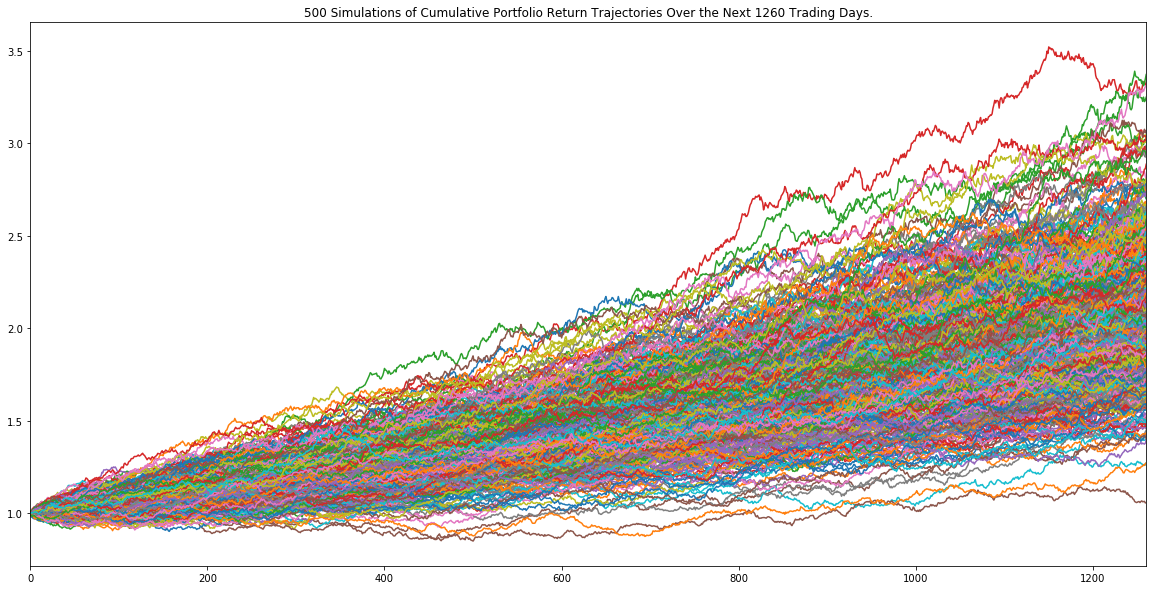

In [208]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_5 = MC_5_dist.plot_simulation()

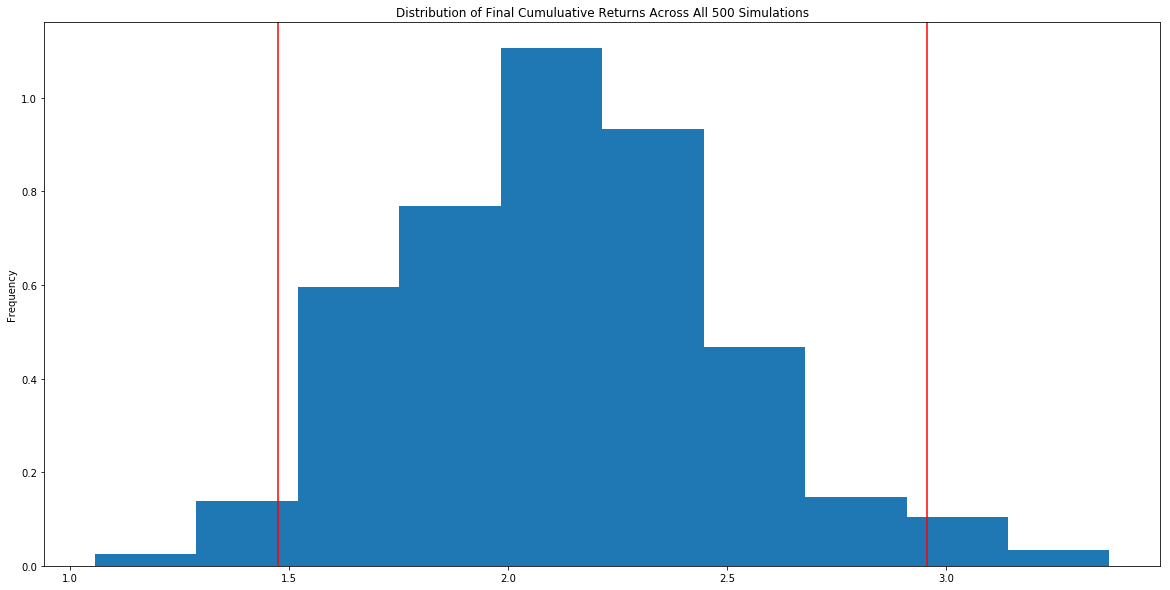

In [209]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_5 = MC_5_dist.plot_distribution()

In [210]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC5_summary = MC_5_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(MC5_summary)

count           500.000000
mean              2.119510
std               0.371885
min               1.057997
25%               1.848780
50%               2.114288
75%               2.351120
max               3.372312
95% CI Lower      1.474606
95% CI Upper      2.956470
Name: 1260, dtype: float64


In [211]:
# Set initial investment
# YOUR CODE HERE!
fiveyear_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(MC5_summary[8]*fiveyear_investment,2)
ci_upper_five = round(MC5_summary[9]*fiveyear_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${fiveyear_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $88476.35 and $177388.18


### Ten Years Retirement Option

In [212]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.5,.5],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [213]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995210,1.002120,1.006967,1.006704,0.999975,0.997718,1.006060,0.994984,1.002251,0.999202,...,1.000844,1.003480,0.993433,0.997382,1.003634,0.994525,0.997369,0.995908,0.999565,1.000580
2,0.997537,0.995255,1.007320,1.002022,0.989713,0.992136,1.013070,0.987174,1.000309,1.012629,...,1.003111,1.003105,0.989261,1.004354,1.004331,0.987430,0.992988,0.995392,0.993549,0.992740
3,1.008483,0.997368,1.008242,1.007332,0.989601,0.993310,1.010895,0.991767,1.008819,1.017646,...,1.003466,1.011564,0.991196,1.004193,1.001418,0.993297,0.987586,0.997158,0.992286,0.989627
4,1.010219,0.993885,1.013179,1.000543,0.990731,0.983825,1.013786,0.988004,1.005474,1.018268,...,1.003883,1.023921,0.981421,1.013302,0.997603,1.006537,0.988107,0.995530,0.992340,0.995144
5,1.019310,1.001202,1.019296,1.003741,0.979764,0.981348,1.017798,0.990214,1.017653,1.018592,...,1.001695,1.032195,0.983257,1.019313,0.996432,1.003930,0.997599,0.993332,1.003715,0.989521
6,1.019635,0.998230,1.011973,1.002626,0.981073,0.983601,1.024954,0.981507,1.024191,1.013003,...,0.995673,1.030726,0.986858,1.014470,1.005684,1.002701,0.999640,0.993697,1.009350,1.001038
7,1.019152,0.997502,1.016364,1.006701,0.981686,0.995734,1.022911,0.974710,1.020696,1.012794,...,1.005360,1.034451,0.989089,1.005751,1.003126,1.006773,0.998093,0.994654,1.006969,1.006381
8,1.022278,0.999744,1.012688,1.008457,0.988660,0.997128,1.020812,0.970308,1.027897,1.014743,...,1.006678,1.032842,0.985114,1.015814,1.001556,1.003218,0.991859,0.994246,1.006621,1.009193
9,1.019354,1.000061,1.011713,1.009020,0.994210,1.003021,1.023867,0.971770,1.030767,1.016187,...,0.991229,1.023879,0.988564,1.014649,1.014068,1.005951,0.996796,0.987373,1.015204,1.004833


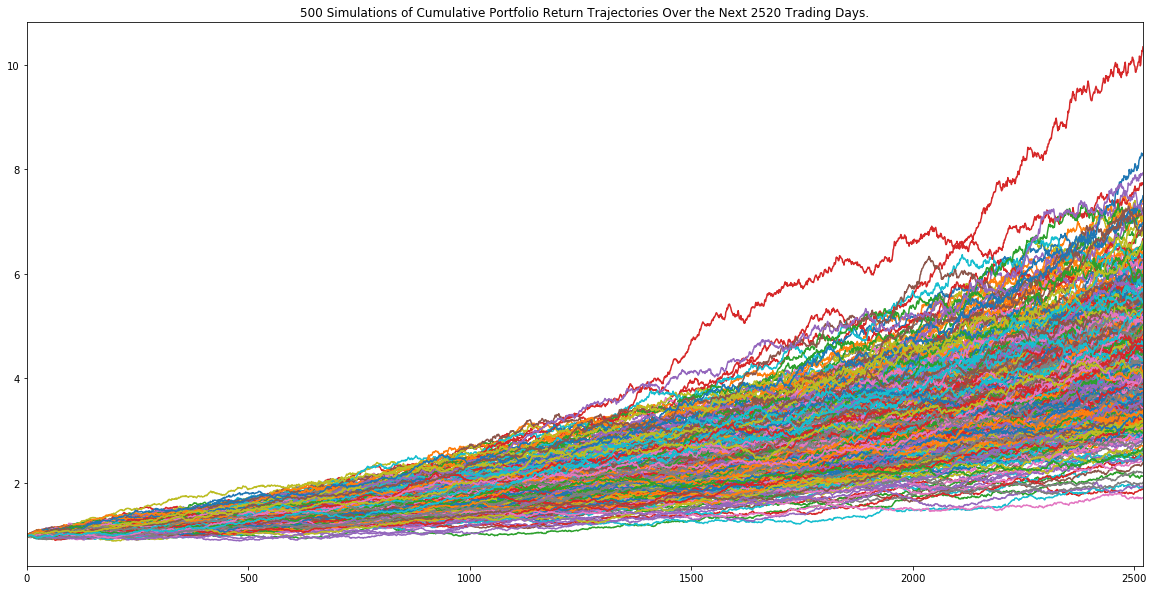

In [214]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_10 = MC_10_dist.plot_simulation()

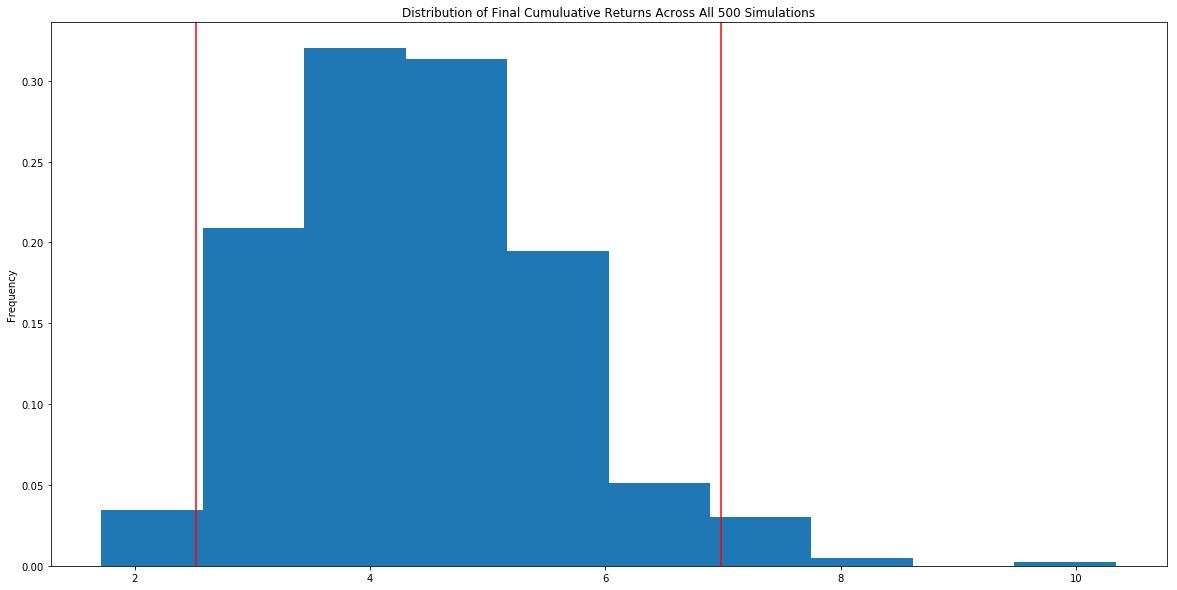

In [215]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_10 = MC_10_dist.plot_distribution()

In [217]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
MC10_summary = MC_10_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(MC10_summary)

count           500.000000
mean              4.419393
std               1.142443
min               1.717156
25%               3.581423
50%               4.365467
75%               5.155318
max              10.336436
95% CI Lower      2.522978
95% CI Upper      6.985804
Name: 2520, dtype: float64


In [218]:
# Set initial investment
# YOUR CODE HERE!
tenyear_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(MC10_summary[8]*tenyear_investment,2)
ci_upper_ten = round(MC10_summary[9]*tenyear_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${tenyear_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $151378.69 and $419148.23
